In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

Duplicate key in file '/Users/yonghyunpark/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')


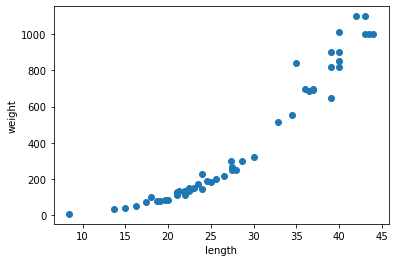

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

In [5]:
from sklearn.metrics import mean_absolute_error

test_predict = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_predict)
print(mae) # 19g 정도 오차가 난다라는

19.157142857142862


In [6]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))
# train_set 보다 test_set의 점수가 낮은게 일반적인데 높은 경우 = 과소적합(underfitting)

0.9698823289099254
0.992809406101064


underfitting의 해결방법 중 하나는 k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법인
이웃개수 k를 줄이는것이다.

In [7]:
knr.n_neighbors = 3 #이웃개수 3으로 줄임, default는 5
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [8]:
print(knr.score(test_input, test_target))
# underfitting 해결

0.9746459963987609


Question. 빈칸을 채워라

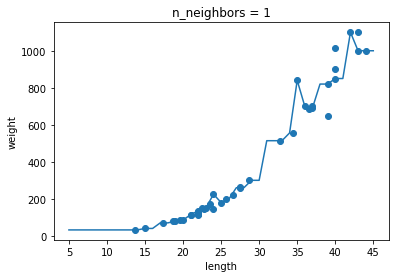

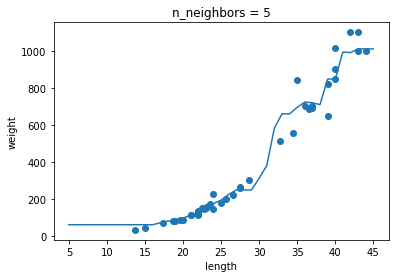

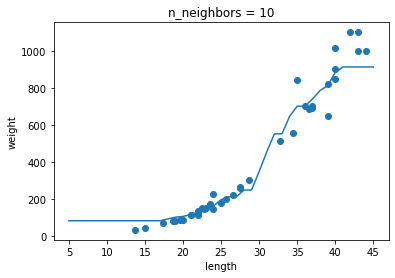

In [15]:
# k-최근접 이웃 회귀 객체를 만든다.
knr = KNeighborsRegressor()
# 5에서 45까지 x좌표를 만든다
x = np.arange(5,46).reshape(-1,1)

# n=1, 5, 10 일때 예측 결과를 그래프로 나타낸다.
for n in [1,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측을 구한다.
    prediction = knr.predict(x)

    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()